## Tidy Data with tidyr

より詳しく知りたい場合には[Tidy Data paer](http://www.jstatsoft.org/v59/paper)を参照して欲しい.

In [1]:
library (tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [4]:
# 同じデータでも表現の方法は様々ある
table1; table2; table3; table4a; table4b

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


country,year,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


country,1999,2000
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


country,1999,2000
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


テーブルを表現するルールは次とする.
- variable: 列
- observations: 行
- values: セルの値

データセットをつくるときにすることは三つある. 
- データセットをtibbleにする
- variableはカラムにいれる


In [8]:
table1 %>%
    mutate (rate = cases / population * 1e4)

country,year,cases,population,rate
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


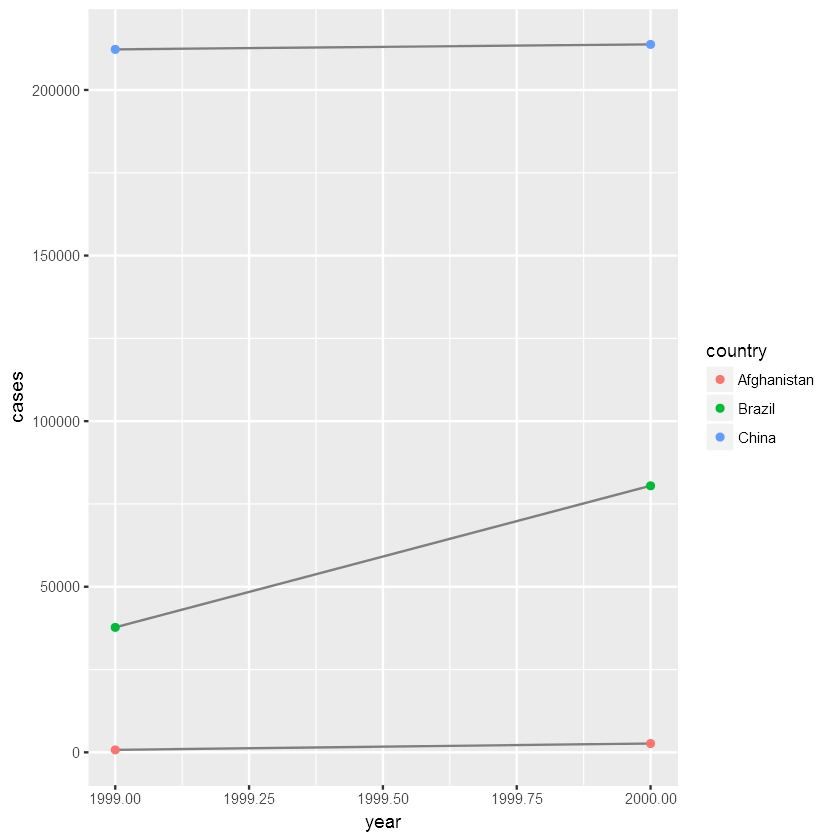

In [10]:
ggplot(table1, aes(year, cases)) + 
    geom_line (aes(group= country), color="grey50") + 
    geom_point (aes(color=country))

### Spreading and Gathering

In [14]:
## gatherデータを寄せることができる
table4a %>%
    gather(`1999`, `2000`, key = "year", value = "cases")

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [15]:
## selectと同じ記法でカラムを選択することが可能である
table4a %>%
    gather (one_of(c ("1999", "2000")), key="year", value="cases")

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [16]:
## spreadでデータを展開
spread(table2, key=type, value=count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [22]:
## 練習
stocks <- 
tibble (
    year = c (2015, 2015, 2016, 2016), 
    half = c (   1,    2,    1,    2), 
    return = c (1.88, .59, .92, .17)
)

stocks %>%
    spread(key = year, value = return) %>%
    gather (key="year", value="return", `2015`:`2016`)


half,year,return
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


### Separating and Pull

separateで分割して, uniteでくっつける. 


In [26]:
## convertをつけておくと, integerで良い
table3 %>%
    separate (rate, into = c ("cases", "population"), sep="/")

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [27]:
## separateは数値に対しても実行できる
table3 %>%
    separate(year, into=c("century", "year"), sep=2)

country,century,year,rate
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


In [32]:
table5 %>%
    unite(new, century, year, sep="")

country,new,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [45]:
## fillで欠測値を埋めることが可能である
treatment <- tibble (
    person    = c ("A", NA, NA, "B"), 
    treatment = 1:4, 
    response  = c (1, NA, 3, 4)
)
fill (treatment, person, response, .direction = c ("down"))

person,treatment,response
A,1,1
A,2,1
A,3,3
B,4,4
